In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import yfinance as yf
from datetime import datetime
from curl_cffi import requests

In [16]:
session = requests.Session(impersonate="chrome")
data = yf.download(tickers='TSLA',start="2015-01-01",end=datetime.today(),session=session,auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [9]:
TSLA = yf.Ticker("TSLA")

In [11]:
TSLA.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [12]:
for key, value in TSLA.info.items():
    print(f"{key}: {value}")

address1: 1 Tesla Road
city: Austin
state: TX
zip: 78725
country: United States
phone: 512 516 8177
website: https://www.tesla.com
industry: Auto Manufacturers
industryKey: auto-manufacturers
industryDisp: Auto Manufacturers
sector: Consumer Cyclical
sectorKey: consumer-cyclical
sectorDisp: Consumer Cyclical
longBusinessSummary: Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; purchase financin

In [13]:
df = TSLA.history(period="max")
print(df.to_string())

                                 Open        High         Low       Close     Volume  Dividends  Stock Splits
Date                                                                                                         
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667  281494500        0.0           0.0
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667  257806500        0.0           0.0
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000  123282000        0.0           0.0
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   77097000        0.0           0.0
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000  103003500        0.0           0.0
2010-07-07 00:00:00-04:00    1.093333    1.108667    0.998667    1.053333  103825500        0.0           0.0
2010-07-08 00:00:00-04:00    1.076000    1.168000    1.038000    1.164000  115671000        0.0           0.0
2010-07-09

In [17]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2015-01-02,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


In [18]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2025-05-12,318.380005,318.380005,322.209991,311.500000,321.989990,112826700
2025-05-13,334.070007,334.070007,337.589996,316.799988,320.000000,136992600
2025-05-14,347.679993,347.679993,350.000000,337.000000,342.500000,136997300
2025-05-15,342.820007,342.820007,346.140015,334.720001,340.339996,97882600
2025-05-16,349.980011,349.980011,351.619995,342.329987,346.239990,93811800


In [8]:
data.info

<bound method DataFrame.info of Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2015-01-02   14.620667   14.883333   14.217333   14.858000   71466000
2015-01-05   14.006000   14.433333   13.810667   14.303333   80527500
2015-01-06   14.085333   14.280000   13.614000   14.004000   93928500
2015-01-07   14.063333   14.318667   13.985333   14.223333   44526000
2015-01-08   14.041333   14.253333   14.000667   14.187333   51637500
...                ...         ...         ...         ...        ...
2025-05-12  318.380005  322.209991  311.500000  321.989990  112826700
2025-05-13  334.070007  337.589996  316.799988  320.000000  136992600
2025-05-14  347.679993  350.000000  337.000000  342.500000  136997300
2025-05-15  342.820007  346.140015  334.720001  340.339996   97882600
2025-05-16  349.980011  351.619995  342.329987  346.239990

In [19]:
# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

In [20]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Daily Return
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2015-01-02,14.620667,14.620667,14.883333,14.217333,14.858000,71466000,NaN
2015-01-05,14.006000,14.006000,14.433333,13.810667,14.303333,80527500,-0.042041
2015-01-06,14.085333,14.085333,14.280000,13.614000,14.004000,93928500,0.005664
2015-01-07,14.063333,14.063333,14.318667,13.985333,14.223333,44526000,-0.001562
2015-01-08,14.041333,14.041333,14.253333,14.000667,14.187333,51637500,-0.001564


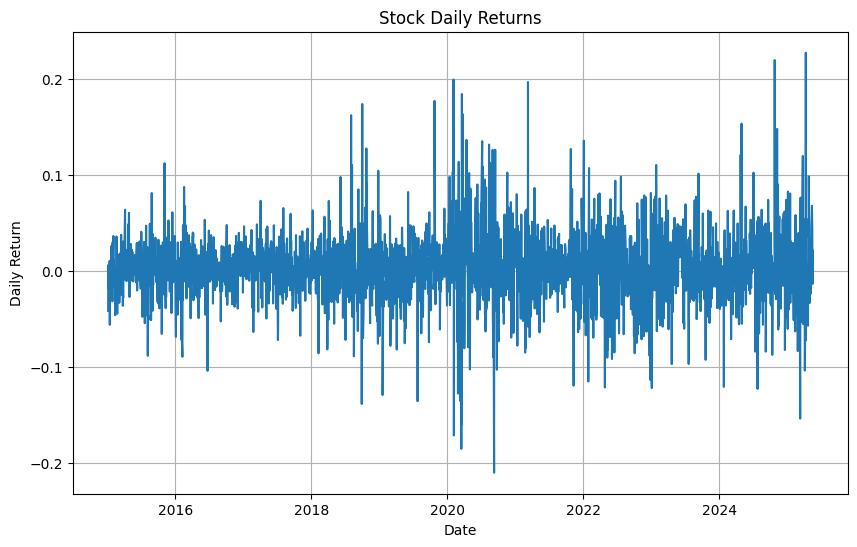

In [21]:
# Line chart for daily returns
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Daily Return'])
plt.title('Stock Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

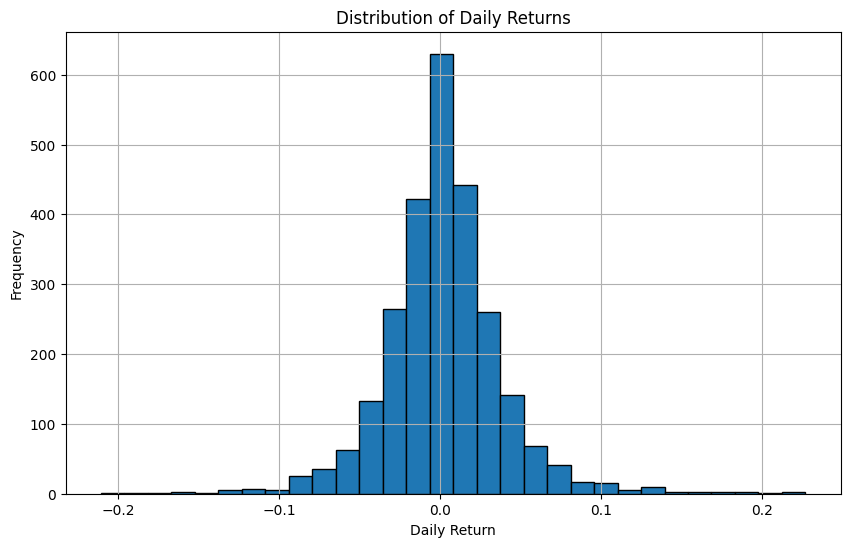

In [22]:
# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(data['Daily Return'], bins=30, edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [30]:
import yfinance as yf


# Define the ticker symbol of the stock to analyze
tickerSymbol = 'AAPL'


# Set the start and end date of the historical data
startDate = '2019-01-01'
endDate = '2022-01-01'


# Retrieve the historical data for the stock
stockData = yf.Ticker(tickerSymbol).history(start=startDate, end=endDate)

In [31]:
marketCap = stockData['Close'][-1] * yf.Ticker(tickerSymbol).info['sharesOutstanding']        

C:\Users\dell\AppData\Local\Temp\ipykernel_19772\1157741374.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  marketCap = stockData['Close'][-1] * yf.Ticker(tickerSymbol).info['sharesOutstanding']


In [32]:
marketCap

2603126946633.1875

In [33]:
peRatio = stockData['Close'][-1] / yf.Ticker(tickerSymbol).info['epsTrailingTwelveMonths']        

C:\Users\dell\AppData\Local\Temp\ipykernel_19772\1967040774.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  peRatio = stockData['Close'][-1] / yf.Ticker(tickerSymbol).info['epsTrailingTwelveMonths']


In [34]:
peRatio

27.147624648620035

In [35]:
bookValue = yf.Ticker(tickerSymbol).info['bookValue']
pbRatio = stockData['Close'][-1] / bookValue

C:\Users\dell\AppData\Local\Temp\ipykernel_19772\4057931905.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pbRatio = stockData['Close'][-1] / bookValue


In [38]:
print(bookValue)
print(pbRatio)

4.471
38.981827386298505


In [39]:
dividendYield = yf.Ticker(tickerSymbol).info['trailingAnnualDividendYield']

In [40]:
dividendYield

0.0047292504

In [41]:
grossMargin = (stockData['Close'][-1] - stockData['Open'][0]) / stockData['Open'][0]        

C:\Users\dell\AppData\Local\Temp\ipykernel_19772\1625121479.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grossMargin = (stockData['Close'][-1] - stockData['Open'][0]) / stockData['Open'][0]


In [42]:
grossMargin

3.7237475026353857

In [62]:
import yfinance as yf

# Define the ticker symbol for Microsoft
ticker = "MSFT"

# Fetch data
msft = yf.Ticker(ticker)

# Get balance sheet
balance_sheet = msft.quarterly_balance_sheet
print(balance_sheet)


                                                      2025-03-31  \
Ordinary Shares Number                              7433982235.0   
Share Issued                                        7433982235.0   
Net Debt                                           14053000000.0   
Total Debt                                         60567000000.0   
Tangible Book Value                               178594000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments   79612000000.0   
Other Short Term Investments                       50784000000.0   
Cash And Cash Equivalents                          28828000000.0   
Cash Equivalents                                   18148000000.0   
Cash Financial                                     10680000000.0   

                                                      2024-12-31  \
Ordinary Shares Number                              7435256940.0   
Share Issued                                   

In [ ]:
balance_sheet.head

<bound method NDFrame.head of                                                       2025-03-31  \
Ordinary Shares Number                              7433982235.0   
Share Issued                                        7433982235.0   
Net Debt                                           14053000000.0   
Total Debt                                         60567000000.0   
Tangible Book Value                               178594000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments   79612000000.0   
Other Short Term Investments                       50784000000.0   
Cash And Cash Equivalents                          28828000000.0   
Cash Equivalents                                   18148000000.0   
Cash Financial                                     10680000000.0   

                                                      2024-12-31  \
Ordinary Shares Number                              7435256940.0   
Share Issued     

In [67]:
comp_financials = pd.DataFrame(balance_sheet)
comp_financials = comp_financials.transpose()

In [68]:
comp_financials

,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,Common Stock Equity,...,Raw Materials,Receivables,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2025-03-31,7433982235.0,7433982235.0,14053000000.0,60567000000.0,178594000000.0,364772000000.0,42438000000.0,178594000000.0,17686000000.0,321891000000.0,...,327000000.0,51700000000.0,51700000000.0,-695000000.0,52395000000.0,79612000000.0,50784000000.0,28828000000.0,18148000000.0,10680000000.0
2024-12-31,7435256940.0,7435256940.0,27488000000.0,62224000000.0,158119000000.0,347665000000.0,38198000000.0,158119000000.0,17254000000.0,302695000000.0,...,345000000.0,48188000000.0,48188000000.0,-662000000.0,48850000000.0,71551000000.0,54069000000.0,17482000000.0,7835000000.0,9647000000.0
2024-09-30,7436000000.0,7436000000.0,24277000000.0,61478000000.0,141598000000.0,332840000000.0,34726000000.0,141598000000.0,16361000000.0,287723000000.0,...,488000000.0,44148000000.0,44148000000.0,-647000000.0,44795000000.0,78429000000.0,57589000000.0,20840000000.0,10252000000.0,10588000000.0
2024-06-30,7434138859.0,7434138859.0,33315000000.0,67127000000.0,121660000000.0,320107000000.0,34448000000.0,121660000000.0,15497000000.0,268477000000.0,...,394000000.0,56924000000.0,56924000000.0,-830000000.0,57754000000.0,75531000000.0,57216000000.0,18315000000.0,6744000000.0,11571000000.0
2024-03-31,7432305794.0,7432305794.0,45808000000.0,79911000000.0,105161000000.0,318594000000.0,28655000000.0,105161000000.0,14469000000.0,253152000000.0,...,341000000.0,44029000000.0,44029000000.0,-616000000.0,44645000000.0,80013000000.0,60379000000.0,19634000000.0,8053000000.0,11581000000.0


In [69]:
comp_financials.columns

Index(['Ordinary Shares Number', 'Share Issued', 'Net Debt', 'Total Debt',
       'Tangible Book Value', 'Invested Capital', 'Working Capital',
       'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Stockholders Equity',
       'Gains Losses Not Affecting Retained Earnings',
       'Other Equity Adjustments', 'Retained Earnings', 'Capital Stock',
       'Common Stock', 'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities', 'Tradeand Other Payables Non Current',
       'Non Current Deferred Liabilities', 'Non Current Deferred Revenue',
       'Non Current Deferred Taxes Liabilities',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease Obligation', 'Long Term Debt',
       'Current Liabilities', 'Other Current Liabilities',
       'Current Deferred Liabilities',

In [70]:
print(balance_sheet.index)

Index(['Ordinary Shares Number', 'Share Issued', 'Net Debt', 'Total Debt',
       'Tangible Book Value', 'Invested Capital', 'Working Capital',
       'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Stockholders Equity',
       'Gains Losses Not Affecting Retained Earnings',
       'Other Equity Adjustments', 'Retained Earnings', 'Capital Stock',
       'Common Stock', 'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities', 'Tradeand Other Payables Non Current',
       'Non Current Deferred Liabilities', 'Non Current Deferred Revenue',
       'Non Current Deferred Taxes Liabilities',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease Obligation', 'Long Term Debt',
       'Current Liabilities', 'Other Current Liabilities',
       'Current Deferred Liabilities',

In [65]:
# Fetch the income statement data
income_statement = msft.financials

# Get Net Income and Shareholder's Equity
net_income = income_statement.loc['Net Income']
shareholders_equity = balance_sheet.loc['Stockholders Equity']

In [58]:
# Calculate Current Ratio
current_ratio = balance_sheet.loc['Current Assets'] / balance_sheet.loc['Current Liabilities']

# Calculate Debt-to-Equity Ratio
debt_to_equity = balance_sheet.loc['Total Liabilities Net Minority Interest'] / balance_sheet.loc['Stockholders Equity']

# Calculate ROE
# Extract Net Income from the income statement
net_income = income_statement.loc['Net Income']
# Extract Stockholders Equity from the balance sheet
shareholders_equity = balance_sheet.loc['Stockholders Equity']

# Calculate Return on Equity (ROE)
roe = net_income / shareholders_equity

# Display the calculated ratios
print(f"Current Ratio: {current_ratio}")
print(f"Debt-to-Equity Ratio: {debt_to_equity}")
print(f"Return on Equity (ROE): {roe}")

Current Ratio: 2024-06-30    1.274955
2023-06-30    1.769167
2022-06-30    1.784607
2021-06-30    2.079994
dtype: object
Debt-to-Equity Ratio: 2024-06-30    0.907661
2023-06-30    0.997721
2022-06-30    1.190679
2021-06-30    1.350755
dtype: object
Return on Equity (ROE): 2024-06-30    0.328281
2023-06-30    0.350887
2022-06-30    0.436755
2021-06-30    0.431522
dtype: object


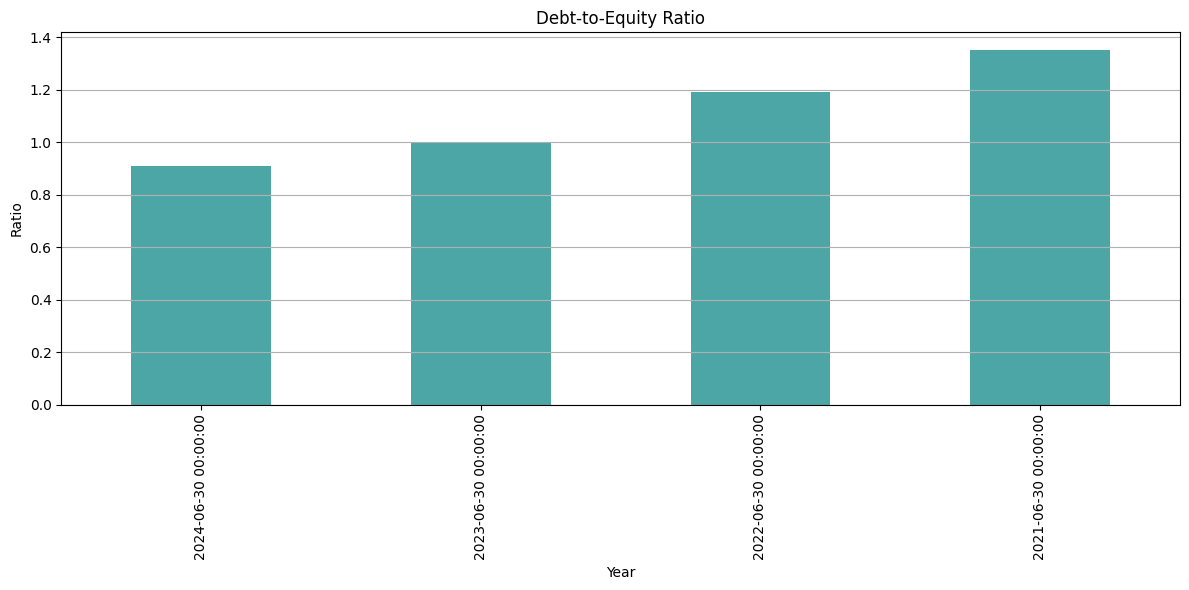

In [59]:
# Plotting the Debt-to-Equity Ratio
plt.figure(figsize=(12, 6))
debt_to_equity.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Debt-to-Equity Ratio')
plt.ylabel('Ratio')
plt.xlabel('Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

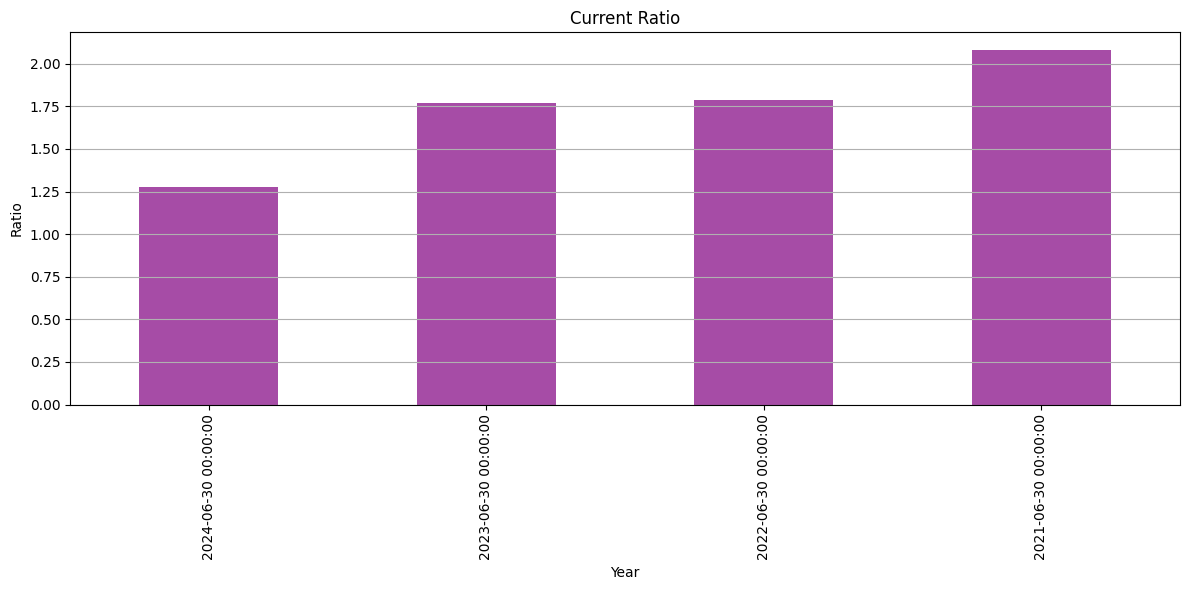

In [60]:
# Plotting the Current Ratio
plt.figure(figsize=(12, 6))
current_ratio.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Current Ratio')
plt.ylabel('Ratio')
plt.xlabel('Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

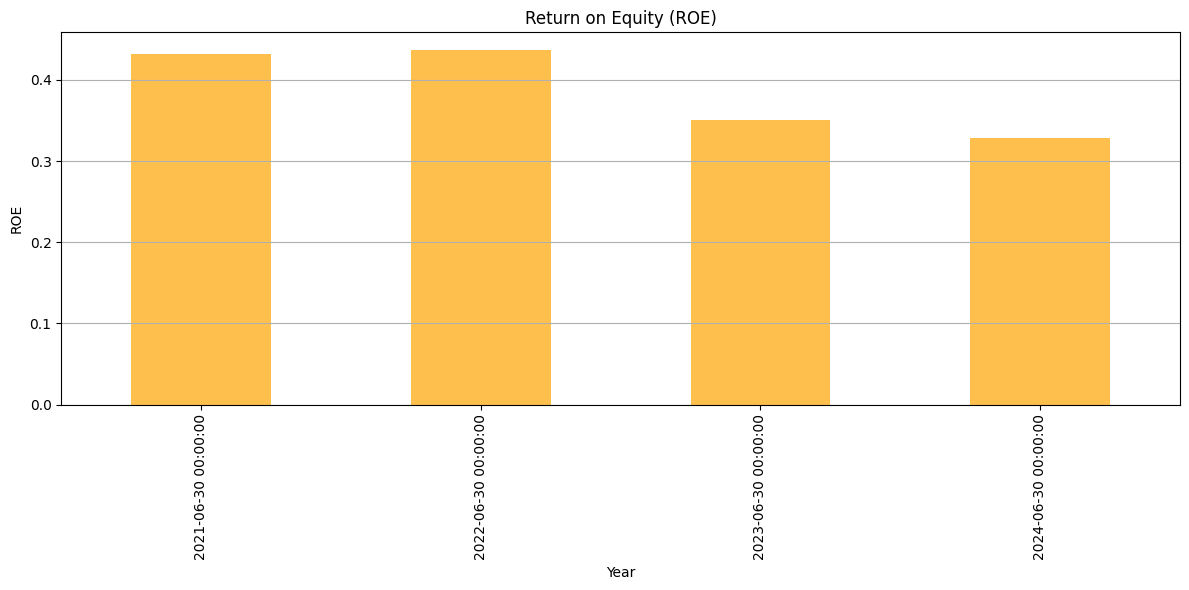

In [61]:
# Plotting the ROE
plt.figure(figsize=(12, 6))
roe.sort_index().plot(kind='bar', color='orange', alpha=0.7)  # Sorting by year in ascending order
plt.title('Return on Equity (ROE)')
plt.ylabel('ROE')
plt.xlabel('Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()